In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from PIL import Image
from numpy import array
import sift
from pylab import *
import os
import csv
from sklearn.cluster import KMeans

In [19]:


DATASET = "dataset_update"
DATASET_SIFT = "dataset_sift_update"

for filename in os.listdir(DATASET):
    
    #img = array(Image.open(DATASET +'/'+ filename ).convert('L'))
    sift.process_image(DATASET +'/'+ filename,DATASET_SIFT+'/'+os.path.splitext(filename)[0]+'.sift')
   
    #print os.path.splitext(filename)[0]



processed tmp.pgm to dataset_sift_update/ukbench00000.sift
processed tmp.pgm to dataset_sift_update/ukbench00001.sift
processed tmp.pgm to dataset_sift_update/ukbench00002.sift
processed tmp.pgm to dataset_sift_update/ukbench00003.sift
processed tmp.pgm to dataset_sift_update/ukbench00004.sift
processed tmp.pgm to dataset_sift_update/ukbench00005.sift
processed tmp.pgm to dataset_sift_update/ukbench00006.sift
processed tmp.pgm to dataset_sift_update/ukbench00007.sift
processed tmp.pgm to dataset_sift_update/ukbench00008.sift
processed tmp.pgm to dataset_sift_update/ukbench00009.sift
processed tmp.pgm to dataset_sift_update/ukbench00010.sift
processed tmp.pgm to dataset_sift_update/ukbench00011.sift
processed tmp.pgm to dataset_sift_update/ukbench00012.sift
processed tmp.pgm to dataset_sift_update/ukbench00013.sift
processed tmp.pgm to dataset_sift_update/ukbench00014.sift
processed tmp.pgm to dataset_sift_update/ukbench00015.sift
processed tmp.pgm to dataset_sift_update/ukbench00016.si

In [61]:

arr = list()

#block_list = ['1001.sift','1006.sift','174.sift','183.sift','197.sift','254.sift']

for filename in os.listdir(DATASET_SIFT):
    #print filename
    
    f = loadtxt(DATASET_SIFT+'/'+filename)

    if len(f.shape) <= 1:
        continue
        
    l1,d1 = sift.read_features_from_file(DATASET_SIFT+'/'+filename)
    for row in d1:
        arr.append(row)
    
print 'finish'
#print arr
    

finish


processed tmp.pgm to dataset_sift_update/ukbench00003.sift


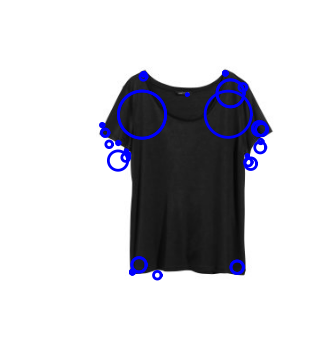

In [25]:
imname = 'dataset_update/ukbench00003.jpg'

im1 = array(Image.open(imname).convert('L'))

sift.process_image(imname,'dataset_sift_update/ukbench00003.sift')

l1,d1 = sift.read_features_from_file('dataset_sift_update/ukbench00003.sift')
figure()
gray()
sift.plot_features(im1,l1,circle=True)
show()

#print row for row in d1


In [63]:
kmeans = KMeans(n_clusters=128, random_state=0).fit(arr)
print 'finish kmeans'


finish kmeans


In [129]:
# create stop word list for q4

stop_val = [0]*128
for val in kmeans.labels_:
    stop_val[val] += 1
    
index = 0
stop_list =list()
for val in stop_val:
    row_data =(index,val)
    stop_list.append(row_data)
    index += 1

print stop_val
print stop_list


stop_list = sorted(stop_list,key=lambda stop_list:stop_list[1])
stop_list = stop_list[::-1]
print stop_list[:10]


f=open("stop_word_list.csv","w")
w=csv.writer(f)

for row in stop_list[:10]:
    w.writerows([[row[0]]])
    
f.close()




[768, 1452, 735, 1325, 1157, 833, 1804, 1053, 1275, 1172, 807, 1447, 1840, 1421, 997, 1770, 1024, 979, 1758, 1811, 1825, 2346, 2198, 1485, 1713, 2168, 1552, 1390, 1137, 1160, 890, 874, 1698, 825, 1542, 1184, 1318, 724, 1584, 1468, 1784, 1363, 1471, 1902, 1060, 1731, 1558, 1979, 955, 1605, 912, 1041, 2038, 1395, 575, 1143, 1337, 1165, 1532, 703, 4342, 1739, 1372, 1093, 1059, 1370, 1458, 929, 749, 1105, 1038, 983, 1749, 1394, 3331, 1274, 2243, 1484, 1220, 1410, 739, 1414, 1145, 1245, 1145, 1659, 773, 1755, 1050, 1450, 1629, 1178, 1153, 859, 1226, 2038, 1803, 1192, 882, 1025, 1187, 1049, 743, 1254, 1385, 864, 1356, 1264, 1096, 1230, 1752, 1696, 1344, 1344, 1662, 1422, 1360, 1016, 1342, 1318, 1077, 1052, 1608, 1206, 1367, 2223, 923, 1513]
[(0, 768), (1, 1452), (2, 735), (3, 1325), (4, 1157), (5, 833), (6, 1804), (7, 1053), (8, 1275), (9, 1172), (10, 807), (11, 1447), (12, 1840), (13, 1421), (14, 997), (15, 1770), (16, 1024), (17, 979), (18, 1758), (19, 1811), (20, 1825), (21, 2346), (22, 2

In [87]:
print kmeans.cluster_centers_
k_center =  kmeans.cluster_centers_
f=open("kmean_center.csv","w")
w =csv.writer(f)

for center in k_center:
    w.writerows([center])
    
f.close()

[[  5.55729167   3.01692708   1.92447917 ...,   5.47916667   4.51692708
    6.35807292]
 [ 23.63498623  13.35950413  11.1707989  ...,  36.6322314   20.25344353
   17.38498623]
 [ 82.76598639  26.71564626   5.56462585 ...,   2.14013605   2.05306122
    7.90748299]
 ..., 
 [ 45.52046784  30.20287899  28.60323887 ...,  31.65766982  30.87224471
   23.47818264]
 [ 13.44095341   9.95991333   9.13867822 ...,  12.41170098  12.47778982
    8.3900325 ]
 [ 37.5128883   32.59286186  24.07336418 ...,  29.50892267  18.71249174
   17.87706543]]


In [47]:
l1,d1 = sift.read_features_from_file(DATASET_SIFT+'/ukbench00001.sift')
img_vector = kmeans.predict(d1)
print img_vector

[ 18  32  24   4  60  24  60  24  24  13  29  18  26 119  18  88  15  61
  89  26  31  93  56  91 103  82  18  18  71  80  11   0  71  66  15 109
 123  58  45 112 119  56  13  80 106  48  32  58  58  58  45  57  28  28
  24  32  67  69 100  32  32  32  76  47  85  67  60  18 111  32  32   2
 110 110  18  32  32  32  50 112  83  45  32   0  43  22  13   0  13  43
  22  43  11  11  93]


In [30]:
sift_data = list()

for filename in os.listdir(DATASET_SIFT):
    
    f = loadtxt(DATASET_SIFT+'/'+filename)

    if len(f.shape) <= 1:
        continue
        
    l1,d1 = sift.read_features_from_file(DATASET_SIFT+'/'+filename)
    
    img_vector = kmeans.predict(d1)
    x = [0]*128
    for num in img_vector:
        x[num] = x[num]+1
    img_row = [os.path.splitext(filename)[0]+'.jpg',','.join(str(i) for i in x)]
    sift_data.append(img_row)
    f = open("sift_update.csv","w")
    w = csv.writer(f)
    w.writerows(sift_data)
    f.close()
        

In [58]:
k_center = kmeans.cluster_centers_
test_k = KMeans(n_clusters=128, random_state=0,init=k_center,n_init=1).fit(k_center)

print k_center
print test_k.cluster_centers_

l1,d1 = sift.read_features_from_file(DATASET_SIFT+'/ukbench00001.sift')
img_vector = test_k.predict(d1)
print img_vector

[[  5.55729167   3.01692708   1.92447917 ...,   5.47916667   4.51692708
    6.35807292]
 [ 23.63498623  13.35950413  11.1707989  ...,  36.6322314   20.25344353
   17.38498623]
 [ 82.76598639  26.71564626   5.56462585 ...,   2.14013605   2.05306122
    7.90748299]
 ..., 
 [ 45.52046784  30.20287899  28.60323887 ...,  31.65766982  30.87224471
   23.47818264]
 [ 13.44095341   9.95991333   9.13867822 ...,  12.41170098  12.47778982
    8.3900325 ]
 [ 37.5128883   32.59286186  24.07336418 ...,  29.50892267  18.71249174
   17.87706543]]
[[  5.55729167   3.01692708   1.92447917 ...,   5.47916667   4.51692708
    6.35807292]
 [ 23.63498623  13.35950413  11.1707989  ...,  36.6322314   20.25344353
   17.38498623]
 [ 82.76598639  26.71564626   5.56462585 ...,   2.14013605   2.05306122
    7.90748299]
 ..., 
 [ 45.52046784  30.20287899  28.60323887 ...,  31.65766982  30.87224471
   23.47818264]
 [ 13.44095341   9.95991333   9.13867822 ...,  12.41170098  12.47778982
    8.3900325 ]
 [ 37.5128883   3

In [136]:
def vector_distance(arr1,arr2):
    if len(arr1) != len(arr2):
        return None
    sum,sum_arr1,sum_arr2 = 0,0,0
    
    for i in xrange(len(arr1)):
        sum += arr1[i]*arr2[i]
        sum_arr1 += arr1[i]**2
        sum_arr2 += arr2[i]**2
    
    sum_arr1 = sum_arr1**0.5
    sum_arr2 = sum_arr2**0.5
        
        
    return sum/(sum_arr1*sum_arr2)

In [138]:
f = open('kmean_center.csv','r')
k_center = list()
for row in csv.reader(f):
    #data_arr = np.array([float(i) for i in row])
    data_arr = [float(i) for i in row]
    k_center.append(data_arr)
f.close()
k_center = np.array(k_center)

q_kmeams = KMeans(n_clusters=128, random_state=0,init=k_center,n_init=1).fit(k_center)

#l1,d1 = sift.read_features_from_file(DATASET_SIFT+'/ukbench00001.sift')
#img_vector = q_keams.predict(d1)
#print img_vector

q_img ='dataset_update/ukbench00000.jpg'
sift.process_image(q_img,'q_img.sift')

l1,d1 = sift.read_features_from_file('q_img.sift')
q_img_vector = q_kmeams.predict(d1)

q_vector = [0]*128
for num in q_img_vector:
    q_vector[num] = q_vector[num]+1

f = open('sift_update.csv','r')
rank = list()
for row in csv.reader(f):
    distance = vector_distance(q_vector,[int(i) for i in row[1].split(',')])
    
    if distance == None:
        continue
        
    rank_data = (row[0],distance)
    rank.append(rank_data)
f.close()

rank = sorted(rank,key=lambda rank:rank[1])
rank = rank[::-1]
print rank[:10]


processed tmp.pgm to q_img.sift
[('ukbench00000.sift', 1.0), ('ukbench00591.sift', 0.9400158131912336), ('ukbench00085.sift', 0.9369749612033813), ('ukbench00076.sift', 0.9169197119932357), ('ukbench00759.sift', 0.9154460485399923), ('ukbench00356.sift', 0.9082639335312049), ('ukbench00570.sift', 0.9070788404499482), ('ukbench00174.sift', 0.9059559187501728), ('ukbench00827.sift', 0.9041118892513392), ('ukbench00905.sift', 0.9015685307339537)]
